In [2]:
# Solution link
# https://github.com/dataquestio/solutions/blob/master/Mission529Solutions.ipynb


In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
exchange_rate = pd.read_csv("euro-daily-hist_1999_2022.csv")


In [5]:
exchange_rate


,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2022-11-15,1.5415,1.9558,5.5480,1.3816,0.9790,7.3299,NaN,24.326,7.4388,...,4.9116,NaN,10.8081,1.4238,NaN,NaN,36.9390,19.3608,1.0404,17.8822
1,2022-11-14,1.5427,1.9558,5.4605,1.3706,0.9751,7.2906,NaN,24.289,7.4382,...,4.9043,NaN,10.7713,1.4177,NaN,NaN,36.9780,19.1923,1.0319,17.8393
2,2022-11-11,1.5459,1.9558,5.5147,1.3698,0.9844,7.3267,NaN,24.278,7.4384,...,4.8940,NaN,10.7241,1.4199,NaN,NaN,37.0880,19.0987,1.0308,17.7944
3,2022-11-10,1.5525,1.9558,5.2860,1.3467,0.9834,7.2184,NaN,24.361,7.4381,...,4.8913,NaN,10.8743,1.3963,NaN,NaN,36.7000,18.5100,0.9954,17.6882
4,2022-11-09,1.5538,1.9558,5.1947,1.3501,0.9880,7.2813,NaN,24.337,7.4382,...,4.9045,NaN,10.8450,1.4061,NaN,NaN,36.9990,18.6728,1.0039,17.8770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6172,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
6173,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
6174,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
6175,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975


In [6]:
exchange_rate_copy = exchange_rate.rename(
    columns={r"Period\Unit:": "Time", "[US dollar ]": "us_dollar"}
)


In [7]:
euro_usd = exchange_rate_copy[["Time", "us_dollar"]]


In [8]:
euro_usd["Time"] = pd.to_datetime(euro_usd["Time"])


C:\Users\lyduc\AppData\Local\Temp\ipykernel_21292\2854205183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  euro_usd["Time"] = pd.to_datetime(euro_usd["Time"])


In [9]:
euro_usd.sort_values("Time", inplace=True)  # from oldest to newest
euro_usd.reset_index(drop=True, inplace=True)
euro_usd["Time"]


C:\Users\lyduc\AppData\Local\Temp\ipykernel_21292\4101994049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  euro_usd.sort_values("Time", inplace=True)  # from oldest to newest


0      1999-01-04
1      1999-01-05
2      1999-01-06
3      1999-01-07
4      1999-01-08
          ...    
6172   2022-11-09
6173   2022-11-10
6174   2022-11-11
6175   2022-11-14
6176   2022-11-15
Name: Time, Length: 6177, dtype: datetime64[ns]

In [10]:
euro_usd["us_dollar"].value_counts()


-         62
1.2276     9
1.1215     8
1.1268     7
1.1305     7
          ..
1.3640     1
1.3666     1
1.3753     1
1.3782     1
1.0404     1
Name: us_dollar, Length: 3692, dtype: int64

In [11]:
euro_usd = euro_usd.loc[euro_usd["us_dollar"] != "-"]


In [12]:
euro_usd["us_dollar"].value_counts()
euro_usd["us_dollar"] = euro_usd["us_dollar"].astype(float)


In [13]:
euro_usd.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6115 entries, 0 to 6176
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       6115 non-null   datetime64[ns]
 1   us_dollar  6115 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 143.3 KB


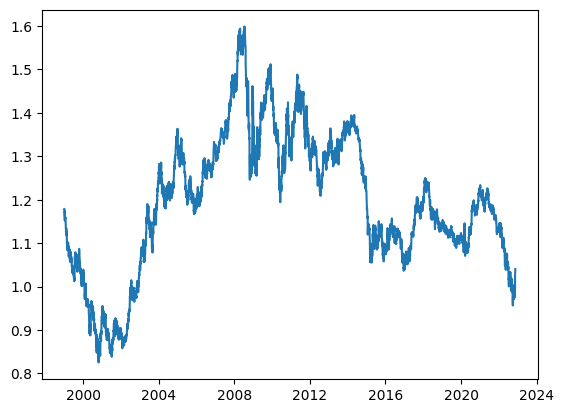

In [14]:
plt.plot(euro_usd["Time"], euro_usd["us_dollar"])
plt.show()


In [140]:
# Process data
bush = euro_usd.copy()[(euro_usd["Time"].dt.year >= 2001) & (euro_usd["Time"].dt.year < 2009)]
obama = euro_usd.copy()[(euro_usd["Time"].dt.year >= 2009) & (euro_usd["Time"].dt.year < 2017)]
trump = euro_usd.copy()[(euro_usd["Time"].dt.year >= 2017) & (euro_usd["Time"].dt.year < 2021)]

rolling_coe = 30
bush["us_dollar"] = bush["us_dollar"].rolling(rolling_coe).mean()
obama["us_dollar"] = obama["us_dollar"].rolling(rolling_coe).mean()
trump["us_dollar"] = trump["us_dollar"].rolling(rolling_coe).mean()

all_presidents = euro_usd.copy()[(euro_usd["Time"].dt.year >= 2001) & (euro_usd["Time"].dt.year < 2021)]
all_presidents["us_dollar"] = all_presidents["us_dollar"].rolling(rolling_coe).mean()

C:\Users\lyduc\AppData\Local\Temp\ipykernel_21292\1452398518.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(
C:\Users\lyduc\AppData\Local\Temp\ipykernel_21292\1452398518.py:70: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(
C:\Users\lyduc\AppData\Local\Temp\ipykernel_21292\1452398518.py:97: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(["2017", "", "2018", "", "2019", "", "2020", "", "2021"], alpha=0.5)


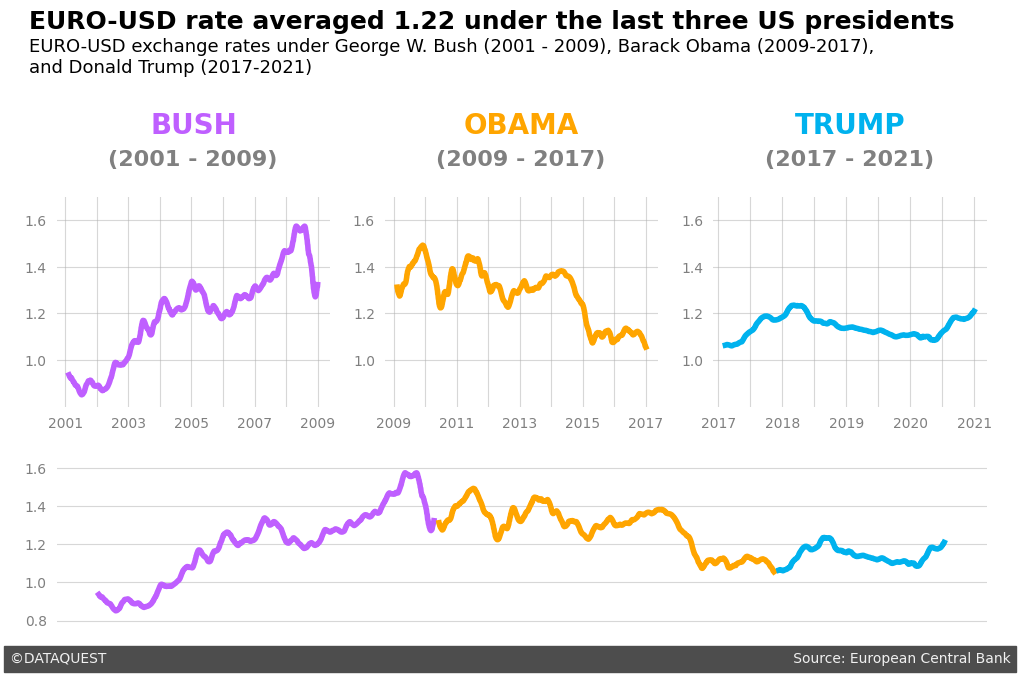

In [161]:
# Placing the plots in the plane
plot_size = (14, 14)
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2, 3, 1)
ax2 = plt.subplot(2, 3, 2)
ax3 = plt.subplot(2, 3, 3)
ax4 = plt.subplot(2, 1, 2)
axes = [ax1, ax2, ax3, ax4]
sides = ["top", "bottom", "left", "right"]

# headings
ax1.text(
    -0.1,
    1.8,
    "EURO-USD rate averaged 1.22 under the last three US presidents",
    fontsize=18,
    weight="bold",
    transform=ax1.transAxes,
)

ax1.text(
    -0.1,
    1.59,
    """EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017),
and Donald Trump (2017-2021)""",
    fontsize=13,
    transform=ax1.transAxes,
)


# For all axes
for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.spines[sides].set_visible(False)
    ax.tick_params(left=False, bottom=False)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(["1.0", "1.2", "1.4", "1.6"], alpha=0.5)


# ax1
ax1.plot(bush["Time"], bush["us_dollar"], color="#BF5FFF", lw=4)
ax1.grid(alpha=0.5)
ax1.set_xticklabels(
    ["", "2001", "", "2003", "", "2005", "", "2007", "", "2009"], alpha=0.5
)
# "transform=ax1.transAxes" parameter: specify text in axis coords ((0, 0) is lower-left and (1, 1) is upper-right)
ax1.text(
    0.3442,
    1.3,
    "BUSH",
    fontsize=20,
    weight="bold",
    color="#BF5FFF",
    transform=ax1.transAxes,
)
ax1.text(
    0.189,
    1.15,
    "(2001 - 2009)",
    fontsize=16,
    weight="bold",
    color="grey",
    transform=ax1.transAxes,
)


# ax2
ax2.plot(obama["Time"], obama["us_dollar"], color="#ffa500", lw=4)
ax2.grid(alpha=0.5)
ax2.set_xticklabels(
    ["", "2009", "", "2011", "", "2013", "", "2015", "", "2017"], alpha=0.5
)
# "transform=ax2.transAxes" parameter: specify text in axis coords ((0, 0) is lower-left and (1, 1) is upper-right)
ax2.text(
    0.29,
    1.3,
    "OBAMA",
    fontsize=20,
    weight="bold",
    color="#ffa500",
    transform=ax2.transAxes,
)
ax2.text(
    0.189,
    1.15,
    "(2009 - 2017)",
    fontsize=16,
    weight="bold",
    color="grey",
    transform=ax2.transAxes,
)


# ax3
ax3.plot(trump["Time"], trump["us_dollar"], color="#00B2EE", lw=4)
ax3.grid(alpha=0.5)
ax3.set_xticklabels(["2017", "", "2018", "", "2019", "", "2020", "", "2021"], alpha=0.5)
# "transform=ax3.transAxes" parameter: specify text in axis coords ((0, 0) is lower-left and (1, 1) is upper-right)
ax3.text(
    0.3,
    1.3,
    "TRUMP",
    fontsize=20,
    weight="bold",
    color="#00B2EE",
    transform=ax3.transAxes,
)
ax3.text(
    0.189,
    1.15,
    "(2017 - 2021)",
    fontsize=16,
    weight="bold",
    color="grey",
    transform=ax3.transAxes,
)


ax4.plot(bush["Time"], bush["us_dollar"], color="#BF5FFF", lw=4)
ax4.plot(obama["Time"], obama["us_dollar"], color="#ffa500", lw=4)
ax4.plot(trump["Time"], trump["us_dollar"], color="#00B2EE", lw=4)
ax.set_xticklabels([])
ax4.set_yticks([0.8, 1.0, 1.2, 1.4, 1.6])
ax4.set_yticklabels([0.8, 1.0, 1.2, 1.4, 1.6])
ax4.grid(alpha=0.5, axis="y")
ax4.set_ylim(0.6, 1.7)

### Adding a signature
ax4.text(-0.05, -0.02, '©DATAQUEST' + ' '*157 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=10, transform=ax4.transAxes)


plt.show()
